In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
import requests
import matplotlib.pyplot as plt 
import numpy as np
import pickle

## Carregando modelos : 

### Modelo 99% : 

### Modelo CNN do zero : 

In [2]:
model_cnn = keras.models.load_model("cnn-zero.keras")

In [3]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,051,750 (7.83 MB)

 Trainable params: 683,916 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,367,834 (5.22 MB)

In [4]:
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Modelo baseado no Random Forest :

In [5]:
with open("model_randomForest.pkl", "rb") as f:
    model_rf = pickle.load(f)

In [6]:
model_rf.feature_importances_

array([0.19702949, 0.20523616, 0.12030331, 0.11215015, 0.20631757,
       0.15896332])

### Modelo baseado na versão de 99% do Kaggle : 

In [7]:
model_99p = keras.models.load_model("cnn-99.keras")

In [8]:
model_99p.summary()

Model: "CompleteModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 512)                 │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Classifier (Sequential)              │ (None, 12)                  │          67,212 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,916,326 (56.90 MB)

 Trainable params: 67,212 (262.55 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 134,426 (525.11 KB)

In [9]:
model_99p.compile(
    optimizer="Adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Funções para carregar as imagens : 

In [10]:
import os 
import sys 
import io

In [11]:
def carregar_imagem(caminho):
    # Carregar imagem
    imagem = load_img(caminho, target_size=(128, 128))  # Redimensionar a imagem para o tamanho desejado
    imagem = img_to_array(imagem) / 255.0  # Normalizar os valores dos pixels para o intervalo [0, 1]
    return imagem


In [12]:
def carregar_imagem_url(url):
    """
    Carrega uma imagem a partir de uma URL e a processa.

    Args:
        url (str): URL da imagem.

    Returns:
        numpy.ndarray: Matriz de pixels da imagem.
    """
    # Fazer requisição HTTP e obter a resposta
    response = requests.get(url)

    # Verificar se a requisição foi bem-sucedida
    if response.status_code != 200:
        raise Exception('Falha ao carregar imagem: ' + str(response.status_code))

    # Decodificar a imagem da resposta
    image = Image.open(io.BytesIO(response.content))

    # Redimensionar e normalizar (opcional)
    image = image.resize((128, 128))
    image = np.array(image) / 255.0

    return image

In [13]:
def load_image_from_path_or_url( img_reference ) : 
    if os.path.exists(img_reference):
        return carregar_imagem( img_reference )
    else: 
        return carregar_imagem_url(img_reference) 

### Imagens de testes : 

In [14]:
# test_image = np.array(load_image_from_path_or_url(input_image))
# test_image.shape

In [15]:
def show_image( img ):
    plt.imshow(img, interpolation='nearest')
    plt.show()

In [16]:
HAND_MAP = sorted(['0L', '1L', '2L', '3L', '4L', '5L', '0R', '1R', '2R', '3R', '4R', '5R'])

In [17]:
def check_prediction( pred, resp ): 
    _fing = "✅" if pred[0] == resp[0] else "❌"
    _hand = "✅" if pred[1] == resp[1] else "❌"

    return f" Previsto : { pred }  -> Dedos : {_fing} | Mão : {_hand}"

In [18]:
def model_cnn_zero_predict( img, resp ) :

    test_image = np.expand_dims(img, axis=0)  # Add batch dimension    
    pre = model_cnn.predict(test_image)

    index_predict = np.argmax(pre[0], axis=0)
    val = HAND_MAP[index_predict]

    return f"CNN___0 : { check_prediction(val, resp) }"
    

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_VGG16
import pandas as pd

In [20]:
def model_cnn_99p_predict( img_url, resp ) :

    # Crie o ImageDataGenerator com a função de pré-processamento
    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=preprocess_input_VGG16
    )

    test_image = test_generator.flow_from_dataframe(
        dataframe = pd.DataFrame([{"Filepath": img_url, "Label": "5R"}]),
        x_col='Filepath',
        y_col='Label',
        target_size=(128, 128),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False  # Não embaralhar os dados de teste
    )
    
    pre = model_99p.predict( test_image )
    index_predict = np.argmax(pre[0], axis=0)
    val = HAND_MAP[index_predict]
    
    return f"CNN_99P : { check_prediction(val, resp) }"
    

In [21]:
sys.path.append(os.path.join(os.getcwd(), "../Entrega 2/SemCNN/")) # gambiarra por causa do " " em Entrega 2
import process_image

In [22]:
def model_random_forest_predict( img, resp ) :

    img_features = process_image.image_preposing( img )[3:]

    predict_value = model_rf.predict( [ list(img_features) ] )[0]

    return f"SEM_CNN : { check_prediction(predict_value, resp) }"
    

In [23]:
def read_input_image( input_image, resp ):
    test_image = np.array(carregar_imagem(input_image))
    test_image.shape
    
    show_image( test_image ) 

    a = model_cnn_zero_predict( test_image, resp )
    b = model_cnn_99p_predict( input_image, resp )
    c = model_random_forest_predict( Image.open( input_image ).convert("L"), resp )

    print(f"Resposta -> { resp } :  \n * {a} \n * {b} \n * {c}")
    print("---" * 20)

    

In [24]:
def load_test_images():

    for elem in list_images:
        read_input_image( "images/" + elem[0], elem[1] )


In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
list_images = []

for value in os.listdir("images"):
    resp = value[-6:-4]
    list_images.append( [value, resp] ) 


[['0a523c62-73a2-48b8-a083-6aabb22cbb82_2R.png', '2R'], ['0a564866-b4ba-44a5-a2fa-4b0797511e1d_3L.png', '3L'], ['img-3R.png', '3R'], ['img-hand-1L.png', '1L'], ['img-hand-2R.png', '2R'], ['img-hand-4L.png', '4L'], ['img-teste-0R.png', '0R'], ['teste-3L.png', '3L'], ['teste-3R.png', '3R'], ['teste5R.png', '5R']]


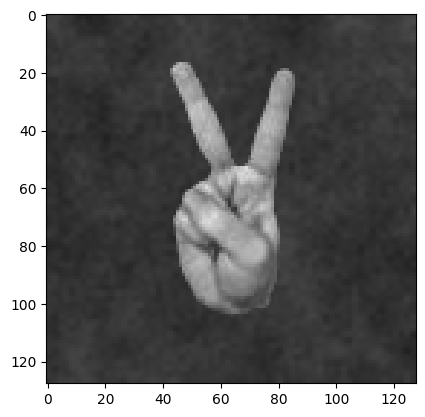

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
Found 1 validated image filenames belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
Resposta -> 2R :  
 * CNN___0 :  Previsto : 2R  -> Dedos : ✅ | Mão : ✅ 
 * CNN_99P :  Previsto : 2R  -> Dedos : ✅ | Mão : ✅ 
 * SEM_CNN :  Previsto : 2R  -> Dedos : ✅ | Mão : ✅
------------------------------------------------------------


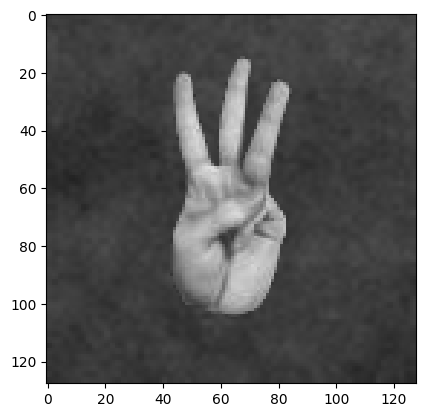

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Found 1 validated image filenames belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Resposta -> 3L :  
 * CNN___0 :  Previsto : 3L  -> Dedos : ✅ | Mão : ✅ 
 * CNN_99P :  Previsto : 3L  -> Dedos : ✅ | Mão : ✅ 
 * SEM_CNN :  Previsto : 3L  -> Dedos : ✅ | Mão : ✅
------------------------------------------------------------


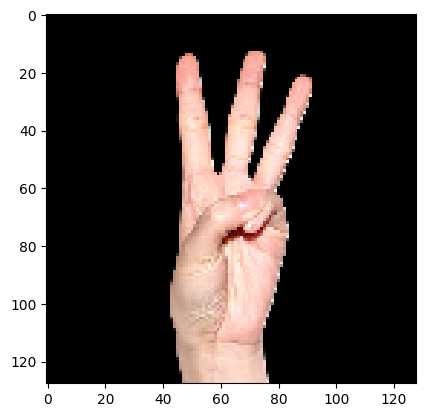

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Found 1 validated image filenames belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Resposta -> 3R :  
 * CNN___0 :  Previsto : 3L  -> Dedos : ✅ | Mão : ❌ 
 * CNN_99P :  Previsto : 2R  -> Dedos : ❌ | Mão : ✅ 
 * SEM_CNN :  Previsto : 2L  -> Dedos : ❌ | Mão : ❌
------------------------------------------------------------


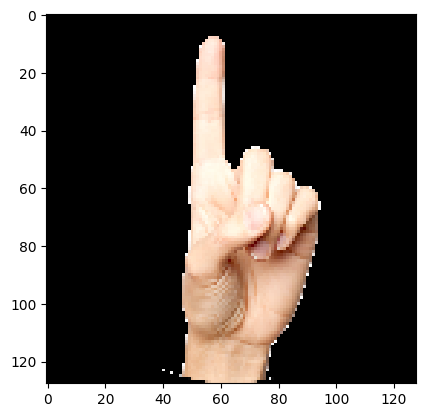

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Found 1 validated image filenames belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Resposta -> 1L :  
 * CNN___0 :  Previsto : 1R  -> Dedos : ✅ | Mão : ❌ 
 * CNN_99P :  Previsto : 1L  -> Dedos : ✅ | Mão : ✅ 
 * SEM_CNN :  Previsto : 2R  -> Dedos : ❌ | Mão : ❌
------------------------------------------------------------


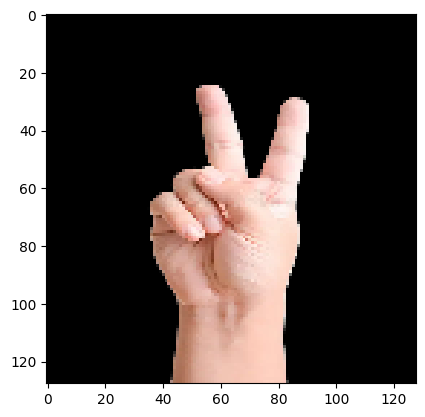

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Found 1 validated image filenames belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Resposta -> 2R :  
 * CNN___0 :  Previsto : 3L  -> Dedos : ❌ | Mão : ❌ 
 * CNN_99P :  Previsto : 1L  -> Dedos : ❌ | Mão : ❌ 
 * SEM_CNN :  Previsto : 2R  -> Dedos : ✅ | Mão : ✅
------------------------------------------------------------


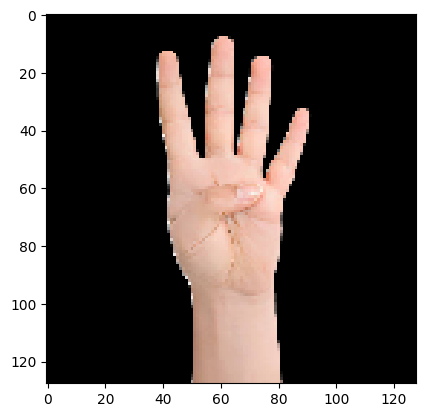

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Found 1 validated image filenames belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Resposta -> 4L :  
 * CNN___0 :  Previsto : 3L  -> Dedos : ❌ | Mão : ✅ 
 * CNN_99P :  Previsto : 3L  -> Dedos : ❌ | Mão : ✅ 
 * SEM_CNN :  Previsto : 4L  -> Dedos : ✅ | Mão : ✅
------------------------------------------------------------


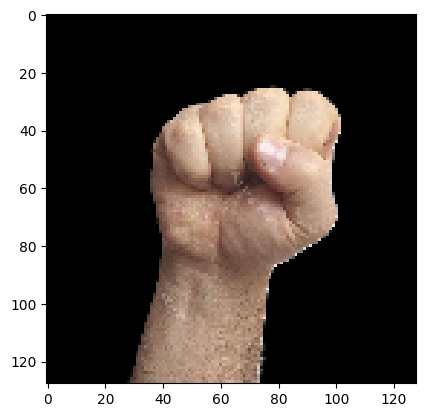

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Found 1 validated image filenames belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Resposta -> 0R :  
 * CNN___0 :  Previsto : 3R  -> Dedos : ❌ | Mão : ✅ 
 * CNN_99P :  Previsto : 1L  -> Dedos : ❌ | Mão : ❌ 
 * SEM_CNN :  Previsto : 0L  -> Dedos : ✅ | Mão : ❌
------------------------------------------------------------


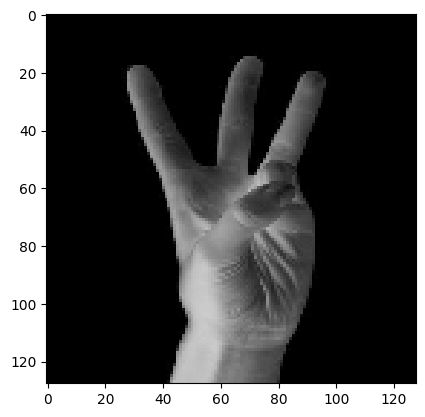

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Found 1 validated image filenames belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Resposta -> 3L :  
 * CNN___0 :  Previsto : 3R  -> Dedos : ✅ | Mão : ❌ 
 * CNN_99P :  Previsto : 3R  -> Dedos : ✅ | Mão : ❌ 
 * SEM_CNN :  Previsto : 1R  -> Dedos : ❌ | Mão : ❌
------------------------------------------------------------


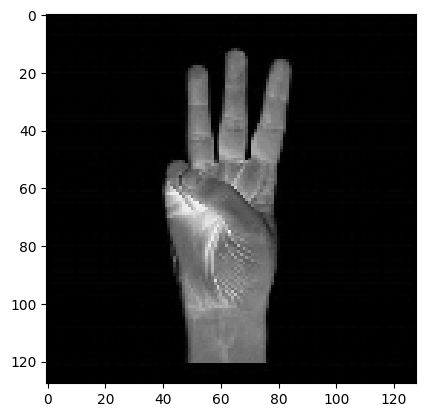

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Found 1 validated image filenames belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Resposta -> 3R :  
 * CNN___0 :  Previsto : 3R  -> Dedos : ✅ | Mão : ✅ 
 * CNN_99P :  Previsto : 0L  -> Dedos : ❌ | Mão : ❌ 
 * SEM_CNN :  Previsto : 3R  -> Dedos : ✅ | Mão : ✅
------------------------------------------------------------


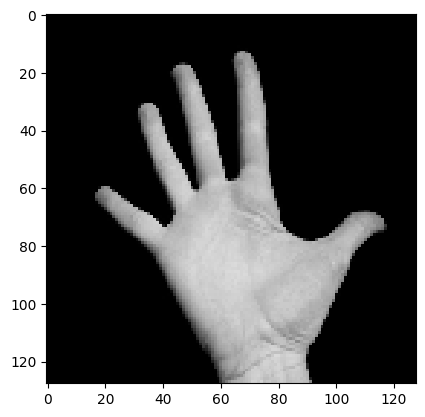

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Found 1 validated image filenames belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Resposta -> 5R :  
 * CNN___0 :  Previsto : 5R  -> Dedos : ✅ | Mão : ✅ 
 * CNN_99P :  Previsto : 5R  -> Dedos : ✅ | Mão : ✅ 
 * SEM_CNN :  Previsto : 5R  -> Dedos : ✅ | Mão : ✅
------------------------------------------------------------


In [27]:
print(list_images)
load_test_images()